<a href="https://colab.research.google.com/github/LIMDANBI/SKTFLYAI/blob/main/DL/regression_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 최소제곱법
### : 변수가 하나인 경우 사용 (기울기와 y절편을 구하는 공식을 이용)

In [1]:
import numpy as np

In [2]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [3]:
mx = np.mean(x)
my = np.mean(y)

In [4]:
mx

5.0

In [5]:
my

90.5

In [6]:
divisor = sum([(i-mx)**2 for i in x])
divisor

20.0

In [7]:
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d+=(x[i]-mx)*(y[i]-my)
  return d

dividend = top(x, mx, y, my)
dividend

46.0

In [8]:
a = dividend/divisor
a

2.3

In [9]:
b = my-(mx*a)
b

79.0

# 평균제곱오차 (MSE)

In [10]:
fake_a = 3
fake_b = 76

In [11]:
def predict(x):
  return fake_a*x + fake_b

In [12]:
predict_result = []

In [13]:
for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f"%(x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100


In [14]:
n = len(x)

In [15]:
def mse(y, y_pred):
  return (1/n)*sum((y-y_pred)**2)

In [16]:
print("평균 제곱 오차: "+str(mse(y, predict_result)))

평균 제곱 오차: 11.0


# 경사하강법

In [17]:
a = 0
b = 0

lr = 0.03
epochs = 2001
n = len(x)

In [18]:
for i in range(epochs):
  y_pred = a*x + b
  error = y-y_pred

  a_diff = (2/n) * sum(-x*(error))
  b_diff = (2/n) * sum(-(error))

  a-=lr*a_diff
  b-=lr*b_diff

  if i%100==0:
    print("epoch=%.f, 기울기=%0.4f, 절편=%0.4f"%(i,a,b))

y_pred = a*x + b

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


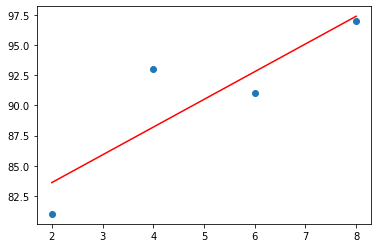

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y)
plt.plot(x, y_pred, 'r')
plt.show()

# 다중 선형 회귀

In [20]:
x1 = np.array([2,4,6,8])
x2 = np.array([0,4,2,3])
y = np.array([81,93,91,97])

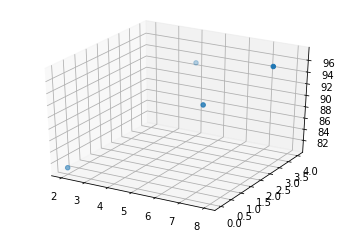

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1,x2,y)
plt.show()

In [22]:
epochs = 2001
n = len(x1)

lr =0.01
a1 = 0
a2 = 0
b = 0

In [23]:
for i in range(epochs):
  y_pred = a1*x1 +a2*x2 + b
  error = y-y_pred

  a1_diff = (2/n) * sum(-x1*(error))
  a2_diff = (2/n) * sum(-x2*(error))
  b_diff = (2/n) * sum(-(error))

  a1-=lr*a1_diff
  a2-=lr*a2_diff
  b-=lr*b_diff

  if i%100==0:
    print("epoch=%.f, a1=%0.4f, a2=%0.4f, b=%0.4f"%(i,a1, a2, b))

y_pred = a1*x1 +a2*x2 + b

epoch=0, a1=9.2800, a2=4.2250, b=1.8100
epoch=100, a1=9.5110, a2=5.0270, b=22.9205
epoch=200, a1=7.3238, a2=4.2950, b=37.8751
epoch=300, a1=5.7381, a2=3.7489, b=48.7589
epoch=400, a1=4.5844, a2=3.3507, b=56.6800
epoch=500, a1=3.7447, a2=3.0608, b=62.4448
epoch=600, a1=3.1337, a2=2.8498, b=66.6404
epoch=700, a1=2.6890, a2=2.6962, b=69.6938
epoch=800, a1=2.3653, a2=2.5845, b=71.9160
epoch=900, a1=2.1297, a2=2.5032, b=73.5333
epoch=1000, a1=1.9583, a2=2.4440, b=74.7103
epoch=1100, a1=1.8336, a2=2.4009, b=75.5670
epoch=1200, a1=1.7428, a2=2.3695, b=76.1904
epoch=1300, a1=1.6767, a2=2.3467, b=76.6441
epoch=1400, a1=1.6286, a2=2.3301, b=76.9743
epoch=1500, a1=1.5936, a2=2.3180, b=77.2146
epoch=1600, a1=1.5681, a2=2.3092, b=77.3895
epoch=1700, a1=1.5496, a2=2.3028, b=77.5168
epoch=1800, a1=1.5361, a2=2.2982, b=77.6095
epoch=1900, a1=1.5263, a2=2.2948, b=77.6769
epoch=2000, a1=1.5191, a2=2.2923, b=77.7260


In [24]:
print("실제 점수: ", y)
print("예측 점수: ", y_pred)

실제 점수:  [81 93 91 97]
예측 점수:  [80.76417234 92.97162951 91.42521942 96.75574296]


# 선형 회귀(텐서플로우)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
x = np.array([2,4,6,8])
y = np.array([81,93,91,97])

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x, y, epochs=2000)

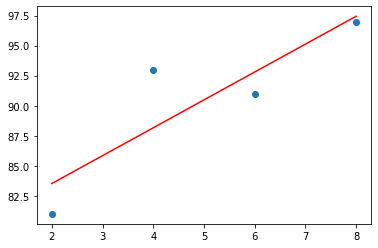

In [28]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'r')
plt.show()

# 다중 선형 회귀(텐서플로우)

In [30]:
x = np.array([[2,0],[4,4],[6,2],[8,3]])
y = np.array([81,93,91,97])

In [32]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))
model.compile(optimizer='sgd', loss='mse')
model.fit(x,y,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 296ms/step - loss: 9806.0020
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 1545.0576
Epoch 3/2000
1/1 [==============================] - 0s 19ms/step - loss: 958.6279
Epoch 4/2000
1/1 [==============================] - 0s 12ms/step - loss: 911.9808
Epoch 5/2000
1/1 [==============================] - 0s 20ms/step - loss: 903.3315
Epoch 6/2000
1/1 [==============================] - 0s 14ms/step - loss: 897.3898
Epoch 7/2000
1/1 [==============================] - 0s 15ms/step - loss: 891.6733
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 886.0068
Epoch 9/2000
1/1 [==============================] - 0s 18ms/step - loss: 880.3784
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 874.7863
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 869.2305
Epoch 12/2000
1/1 [==============================] - 0s 9ms/step - loss: 863.7107
Epoch 13/20

In [45]:
hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("{}시간 공부하고 {}시간 과외를 받을 경우, 예상 점수는 {:.2f} 입니다.".format(hour, private_class, prediction.item()))

7시간 공부하고 4시간 과외를 받을 경우, 예상 점수는 97.53 입니다.
